<a href="https://colab.research.google.com/github/tadrossalama/zoafind/blob/master/bench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastbook &> /dev/null
import os
from fastbook import *
from fastai.vision.all import *
from fastai.vision.widgets import *
from pathlib import Path
from PIL import Image

In [2]:
from google.colab import drive
drive.mount('/content/drive')
path= Path('/content/drive/MyDrive/corals')

Mounted at /content/drive


In [ ]:
coral_types = (
    'Acropora Cervicornis',
    'Acropora Palmata',
    'Colpophyllia Natans',
    'Catalaphyllia jardinae',
    'Dendrogyra cylindrus',
    'Diadema Antillarum',
    'Diploria Strigosa',
    'Euphyllia',
    'Elegance'
    'Gorgonians',
    'Heliofungia actiniformis',
    'Millepora Alcicornis',
    'Montastraea Cavernosa',
    'Meandrina Meandrites',
    'Montipora',
    'Palythoas Palythoa',
    'Siderastrea Siderea',
    'Tunicates',
)


In [ ]:
add_coral_types2 = (
    'Acanthastrea',
    'Alveopora',
    'Blastomussa',
    'Caulastraea Furcata',
    'Euphyllia Divisa',
    'Porites',
    'Pocillopora meandrina',
    'Hydnophora',
    'Cyphastrea',
    'Seriatopora',
    'Leptoseris',
    'Discosoma',
    'Rhodactis',
    'Ricordea'
)

In [ ]:
for o in add_coral_types2:
    dest=(path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o}')
    download_images(dest, urls=results.attrgot('contentUrl'))

In [ ]:
fns= get_image_files(path)
failed = verify_images(fns)
failed.map(Path.unlink)

In [22]:
batch_tfms = [RandomResizedCrop(224), *aug_transforms(mult=1.0, do_flip=True, max_rotate=30.0, max_zoom=1.5,
                            max_lighting=.8, max_warp=0.3, p_lighting=.9)]

In [23]:
corals = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter= RandomSplitter(seed=42),       #splits items between train/val randomly
                 get_y=parent_label,    
                 item_tfms=Resize(460),
                 batch_tfms=batch_tfms)

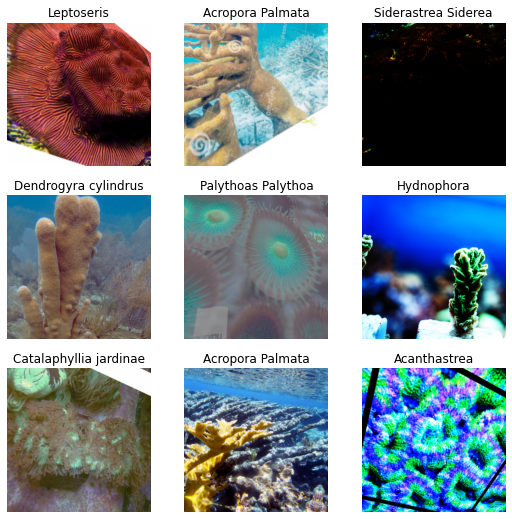

In [33]:
dls= corals.dataloaders(path)
dls.show_batch()

## Resnet50

In [25]:
from fastai.callback.fp16 import *
learn3 = cnn_learner(dls, resnet50, metrics=error_rate).to_fp16()
learn3.fine_tune(6, freeze_epochs=3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:265: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,error_rate,time
0,3.524238,1.551678,0.424837,01:25
1,2.378838,1.213671,0.324183,01:26
2,1.903479,1.067279,0.286275,01:25


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,1.198871,0.902148,0.248366,01:46
1,1.165636,0.844084,0.231373,01:46
2,1.018670,0.708969,0.205229,01:45
3,0.835268,0.699291,0.190850,01:46
4,0.675917,0.626866,0.167320,01:45
5,0.550384,0.621902,0.163399,01:45


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.w

In [32]:
interp = ClassificationInterpretation.from_learner(learn3)
interp.print_classification_report()

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


                          precision    recall  f1-score   support

            Acanthastrea       0.87      0.87      0.87        15
    Acropora Cervicornis       0.78      0.95      0.86        38
        Acropora Palmata       0.92      0.92      0.92        39
               Alveopora       0.94      0.79      0.86        19
             Blastomussa       0.82      0.86      0.84        21
  Catalaphyllia jardinae       0.96      1.00      0.98        23
     Caulastraea Furcata       0.96      0.92      0.94        26
     Colpophyllia Natans       0.47      0.78      0.59        23
              Cyphastrea       0.89      0.96      0.92        25
    Dendrogyra cylindrus       0.90      0.90      0.90        21
      Diadema Antillarum       0.88      1.00      0.93        14
       Diploria Strigosa       0.75      0.30      0.43        30
               Discosoma       0.77      0.55      0.64        31
               Euphyllia       0.78      0.67      0.72        21
        E

## Filtering using optical character recognition
Tesseract is open-source software available for OCR that is straightforward to implement. Here, we use their image_to_string function to examine images after opening them with Pillow. As we’ll later need to look at entire folders of images, we add a simple clause that tells the function whether or not it needs to use Pillow to open the image, before returning the text (if any) that was found.

In [ ]:
!sudo apt install tesseract-ocr -q  &> /dev/null
!pip install pytesseract -q
import pytesseract

def optical_character_recognition(file, path = True):
  """ Simple OCR of text from images.

  Parameters
  ----------
  file: Path or str
    Image to examine.
  path: bool
    Indicates whether the file passed in is a path to a file, or an already opened Pillow Image.
    
  Returns:
  ----------
  str
    Text that was detected.
  """
  if path == True:
    # Use Pillow's Image class to open the image
    img = Image.open(file)
    new_size = tuple(2*x for x in img.size)
    img = img.resize(new_size, Image.ANTIALIAS)
    img = img.convert('L')
    text = pytesseract.image_to_string(img, lang='eng', config='-c tessedit_char_whitelist=01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz --psm 3 --oem 3')
    # Remove '\n\x0c' whiich is found in every image
    text = text[:-3]
  else: 
    # Already opened with Pillow
    new_size = tuple(2*x for x in file.size)
    img = file.resize(new_size, Image.ANTIALIAS)
    img = img.convert('L')
    text = pytesseract.image_to_string(file, lang='eng', config='-c tessedit_char_whitelist=01234567890ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz --psm 3 --oem 3')
    # Remove '\n\x0c' whiich is found in every image
    text = text[:-3]

  return text

In [ ]:
def crop_image(img_path, crop_pct = 0.1):
  """ Crops an image by a certain percent of the image size along the top and bottom of the image.

  Parameters
  ----------
  img_folder: Path or str
    Fold with images to examine.
  crop_pct: float (0<crop_pct<1)
    Percentage of the total height of the image to crop off top and bottom.
    
  Returns:
  ----------
  Cropped image (opened in PIL).
  """
  from PIL import Image
  img_file = Image.open(img_path).convert('RGB')
  [xs,ys] = img_file.size
  crop_x = crop_pct*xs
  crop_y = crop_pct*ys
  box = (0, crop_y, xs, ys-crop_y)
  cropped_image = img_file.crop(box)
  return cropped_image

In [ ]:

def find_artificial_text(img_folder, edge_removal = True, verbose = False):
  """ Searches for artificial text in each image in a image folder using pytesseract.

  Parameters
  ----------
  img_folder: Path or str
    Fold with images to examine.
  edge_removal: bool
    Should the function attempt to crop the edges of the to remove detected text.
    If no text is found, the cropped image is saved.
  verbose: bool
    Should the function print out which images are cropped, and which images have been found to have text.  
    
  Returns:
  ----------
  DataFrame containing images marked as possessing artifical text. 
  """
  from tqdm.notebook import tqdm
  # Initialize DataFrame
  column_names = ['Artificial Images', 'Text Found']
  df_mt = pd.DataFrame(columns = column_names)
  for image_path in tqdm(sorted(img_folder.ls())):
    im = Image.open(image_path).convert('RGB')
    if edge_removal == True:
      # if the image has text
      if len(optical_character_recognition(im, path = False))>0:
        if verbose == True:print(f'Text detected in image {image_path.name}');
        # if the text is along the top or bottom edge, overwrite the old image else make note of it in a dataframe
        if len(optical_character_recognition((crop_image(image_path)).convert('RGB'), path = False)) == 0:
          if verbose == True:print(f'Cropping removed text in image {image_path.name}');
          crop_image(image_path).save(image_path)
        else:
          df_mt = df_mt.append({'Artificial Images':image_path,'Text Found':optical_character_recognition(image_path)}, ignore_index=True)
    # No cropping      
    else:
      if len(optical_character_recognition(im, path=False))>0:
        if verbose==True:print(f'Text detected in image {image_path.name}');
        df_mt = df_mt.append({'Artificial Images':image_path,'Text Found':optical_character_recognition(image_path)}, ignore_index=True)

  # Create dataframe containing images with artificial text towards the center
  if verbose == True:print(f'{len(df_mt)} images with text found in folder {img_folder}.');
  return df_mt

In [ ]:
find_artificial_text(path/'Ctenella chagius')

  0%|          | 0/118 [00:00<?, ?it/s]

,Artificial Images,Text Found
0,/content/drive/MyDrive/corals/Ctenella chagius/00000053.jpg,\n\nSINGAPO\n\n \n\n~\n\na\n3\n\n
1,/content/drive/MyDrive/corals/Ctenella chagius/00000086.jpg,\n \n \n \n\nMeandrina meandrites\n\nEusmilia\nfastigiata\n\nFam. 22081\nMeandrinidae\n\n \n\nCtenella chagu
2,/content/drive/MyDrive/corals/Ctenella chagius/00000111.png,"Species*”*\n\nGroup |\nE. glabrescens\n\nE. cristata’\n\nE, paraglabrescens\n\nE, paraancora\n\nE, paradivisa\n\nE. baliensis ,”\n\nGroup 2\nE. divisa\n\nE, ancora\n\nColony\nstructure’?\n\nPhaceloid\n\nPhaceloid\n\nPhaceloid\n\nPhaceloid\n\nPhaceloid\n\nPhaceloid\n\nFlabello-\nmeandroid\n\nFlabello-\nmeandroid\n\nCorallites*""*\n\nFirst and second order\nsepta plunge steeply\nnear the centre of the\ncorallite. Columella is\nabsent.\n\nFirst and second order\nsepta plunge steeply\nnear the centre of the\ncorallite. Columella is\nabsent.\n\nSkeletons are almost\nidentical to those of E.\ngla..."
3,/content/drive/MyDrive/corals/Ctenella chagius/00000127.JPG,CORALS CORAUX Ji 38\n\nCANADA -HONG KONG (CHINA) JOINT ISSUE\nEMISSION CONJOINTE CANADA-HONG KONG (CHINE) :\nDV Sey in eat cL aro eS aD\n\n \n \n\n \n\n \n \n\nCORALS) CORAUXY\n\n \n\neRe ae)\n\n \n \n\nset\nOOo ecrecarecoescsoecsesooes
4,/content/drive/MyDrive/corals/Ctenella chagius/00000132.jpg,THE CORAL TRIANGLE IS FREQUENTED BY:\n\nee\n\n \n\nTHE BLUE WHALE SPERM WHALES\nDOLPHINS AND\n\nPORPOISES Liar
5,/content/drive/MyDrive/corals/Ctenella chagius/00000136.jpg,10°E\n\n-~5°\n\n~6°\n\na bY\n\nvite\n\nrh\n\nIndian Ocean\n\nChagos\nArchipelago\n\n0 50 Km\n\n \n\nbez 1(S\n\nDeere]\n\nDe eed)\nRr anos\n\nLOB eri\n\n20m)\n\nBIST Try\n\nMaDe\nPTA a ST Ce\n;\n\npee)\n\nEgmont Islands \Q\n\nbaligse Ths\n\nGanges Bank\n\nPOE Miso ling\n\n7\n\nWight Bank\n\n \n\n1 Pd\n\nSpeakers Bank\n\nbeSOSEE MOSMAN OLE\n\n‘\n\nPag\n\n(Unnamed Bank)\n\n1h\n\nColvocoresses Reef\n\nL Pye Coos\n\n2 Senet ty\n\nResa rrr) 4\n\nPOC Ch)\n\nLent\nChagos _\nBrn\n\nIPT er ott\n\nCauvin Bank\n\n“df\n\n6-\n\n7-\n\nthe
6,/content/drive/MyDrive/corals/Ctenella chagius/00000138.jpg,136 182\n\nIntroduction to Introduction to\nCoral Analogues Seashell Analogues\n142 184\n\n \n \n \n \n \n \n \n \n\ni\n\nanes Astraea heliotropium\n\nPachyseris\n# Sunburst Star Turban\n\n148\nlsophyllastrea\n\n192\n4 Busycon Sinistrum\nLightning Whelk\n\n198\nGastropod Radular\n\n158 204\nTubastrea i Tridacna squamosa\nFluted Clam\n162 210\n\nTonicella lineate\nChiton Mollusc\n\nHydnophora fii\nexesa Mae nik\nRAEEKLAN\n168 216\nBayhaium — Ah Nautilus pompilius\nNautilus Shell\n\n220\nA Dentalium elephantinum\n# Elephant Tusk Shell\n\n180 224 The Pedagogical Value of\nCritical ...
7,/content/drive/MyDrive/corals/Ctenella chagius/00000143.png,"CorallTS2+acro\n\n°\n—_\no\na\na Q =\nyn yn }\na\n=a a\nBe Eg &\nFamily Genus Oo Oo O\nIsopora\nAcropora\nAcroporidae| Astreopora\nMontipora\nAnacropora\n\nLeptastrea\nPachyseris\n\nPocilloporidae| Pocillopora\nDendrophyllidae| Tubastraea\n\nScleractinia\nincertae sedis\n\n \n\n \n\n_, Porites\nPoritidae Stylaraea\nPavona\n\nAgariciidae] Leptoseris\nGardinoseris\n\nMussidael Colpophyllia\nCaryophyllidae| Polycyathus\nLobactis\n\nFungia\n\nFungiidae] Danafungia\nPleuractis\n\nLithophyllon\nPsammocoridael Psammocora\nAstrocoeniidae| Stylocoenella\nOxypora\nLobophyllia\nEchinopora\nDipsastrae..."


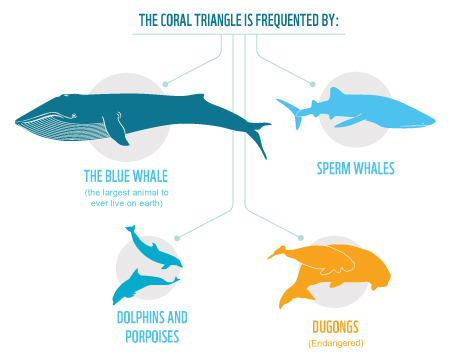

In [ ]:
img = Image.open('/content/drive/MyDrive/corals/Ctenella chagius/00000132.jpg')
img